# H6 (integral)

Mirpulatov Islombek

PHD-1, CDSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

![Math](https://blog.tutoronline.ru/media/591506/2015-06-08-12-44-43-скриншот-экрана.png?width=389px&height=184px)

## 1. Implement the non-parallel version of the integral calculation function (1 point)

In [23]:
def f(x):
    return (x * x - x + 2) / (x ** 4 - 5 * x * x + 4)

In [39]:
def solver(a, b, n):
    x = np.linspace(a, b, n)

    h = (b - a) / (n - 1)

    f_sum = 0
    for i in range(1, n - 1):
        f_sum = f_sum + f(x[i])
    f_sum = f_sum + (f(a) + f(b)) / 2
    
    return f_sum * h

In [40]:
a = 7.0
b = 9.0
n = 10000

integral = solver(a, b, n)

In [41]:
print(integral)

0.031245291969548422


## 2. Implement parallel MPI version using mpi4py (2 points)

In [54]:
%%writefile integral.py

import numpy as np
from mpi4py import MPI


def f(x):
    return (x * x - x + 2) / (x ** 4 - 5 * x * x + 4)


def solver_parallel(a, b, n):
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    n_ = n // size
    a_ = a + rank * n_ * (b - a) / n
    b_ = a_ + n_ * (b - a) / n

    x_ = np.linspace(a_, b_, n_)

    f_sum = 0
    for i in range(1, n_ - 1):
        f_sum += f(x_[i])
    f_sum += (f(a_) + f(b_)) / 2

    f_sum = comm.reduce(f_sum, op=MPI.SUM, root=0)

    if rank == 0:
        h = (b - a) / (n - 1)
        result = f_sum * h
        print(result)


a = 7.0
b = 9.0
n = 10000

solver_parallel(a, b, n)

Overwriting integral.py


## 5. Check the correctness of the calculation results (2 points)

In [55]:
! mpirun -n 4 python integral.py

0.03123591744451202


## 3. Achieve speed up > 1.5 with 2 process parallel version vs. 1 process sequential version (2 points)

## 4. Plot speedup vs. number processes (2 points)

In [61]:
%%writefile integral.py

import numpy as np
from mpi4py import MPI


def f(x):
    return (x * x - x + 2) / (x ** 4 - 5 * x * x + 4)


def solver_parallel(a, b, n):
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    start_time = MPI.Wtime()

    n_ = n // size
    a_ = a + rank * n_ * (b - a) / n
    b_ = a_ + n_ * (b - a) / n

    x_ = np.linspace(a_, b_, n_)

    f_sum = 0
    for i in range(1, n_ - 1):
        f_sum += f(x_[i])
    f_sum += (f(a_) + f(b_)) / 2

    f_sum = comm.reduce(f_sum, op=MPI.SUM, root=0)

    if rank == 0:
        h = (b - a) / (n - 1)
        result = f_sum * h
        end_time = MPI.Wtime()
        t = end_time - start_time 
        print("Size: ", size, "\tTime elapsed: ", np.round(t, 4))


a = 7.0
b = 9.0
n = 100000

solver_parallel(a, b, n)

Overwriting integral.py


In [63]:
for i in range(1, 5):
    ! mpirun -n {i} python integral.py

Size:  1 	Time elapsed:  0.0627
Size:  2 	Time elapsed:  0.0328
Size:  3 	Time elapsed:  0.0232
Size:  4 	Time elapsed:  0.0178


In [64]:
time = np.array([0.0627, 0.0328, 0.0232, 0.0178])
size = np.array([1, 2, 3, 4])

In [65]:
speedup = 0.0627 / time

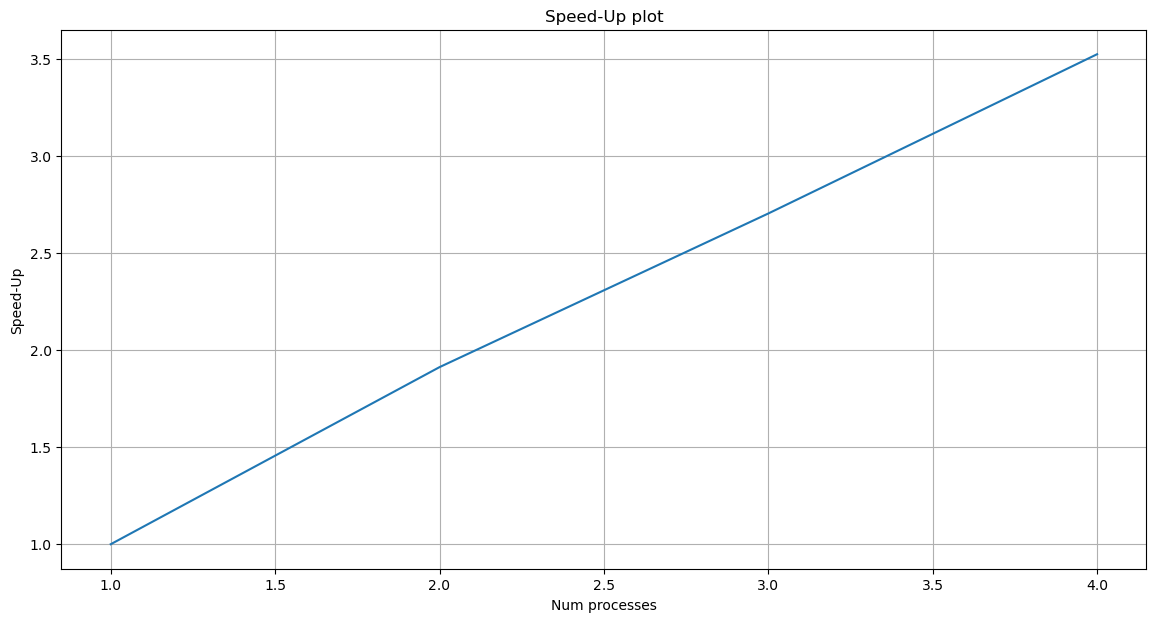

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(size, speedup)
plt.title("Speed-Up plot")
plt.ylabel('Speed-Up')
plt.xlabel('Num processes')
plt.grid()
plt.show()